### Librerias

In [1]:

import os
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

### Datos

In [2]:
workspace = os.getcwd()
Data = pd.read_csv(os.path.join(workspace,'..','Datos_proyectos','Datos_clear.csv'))
Data.drop(columns = ['Unnamed: 0'],inplace = True)
Div = pd.read_csv(os.path.join(workspace,'..','Datos_proyectos','Divipola.csv'))

Se escogen las variables de interes en Div, y se hace la union con los datos de pasajeros, obteniendo como resultado el Dataframe que se manejara para este analisis.

In [3]:
Div = Div[Div['Tipo Centro Poblado'] == 'CABECERA MUNICIPAL']
Div = Div[['Código Municipio','Nombre Departamento','Nombre Municipio','Longitud','Latitud']]

In [4]:
Div.rename(columns = {'Código Municipio':'MUNICIPIO_ORIGEN_RUTA'},inplace = True)
df = Data.join(Div.set_index('MUNICIPIO_ORIGEN_RUTA'),on ='MUNICIPIO_ORIGEN_RUTA',lsuffix='_org',rsuffix='_des')
Div.rename(columns = {'MUNICIPIO_ORIGEN_RUTA':'MUNICIPIO_DESTINO_RUTA'},inplace = True)
df = df.join(Div.set_index('MUNICIPIO_DESTINO_RUTA'),on ='MUNICIPIO_DESTINO_RUTA',lsuffix='_org',rsuffix='_des')

### Acercamiento inicial

Se observa primero como esta conformado los terminales:

In [5]:
df['TERMINAL'].value_counts()

T.T. DE BOGOTÁ SALITRE    822165
T.T. DE MEDELLÍN NORTE    539425
T.T. DE CALI              532036
T.T. DE ARMENIA           367002
T.T. DE PEREIRA           325138
T.T. DE IBAGUÉ            304882
T.T. DE BOGOTÁ NORTE      295743
T.T. DE NEIVA             283398
T.T. DE MEDELLÍN SUR      258662
T.T. DE BOGOTÁ SUR        234794
T.T. DE HONDA             233949
T.T. DE POPAYÁN           231417
T.T. DE ESPINAL           226164
T.T. DE PASTO             225964
T.T. DE TULÚA             223679
T.T. DE BUCARAMANGA       222117
T.T. DE VILLAVICENCIO     206209
T.T. DE MANIZALES         202936
T.T. DE MONTERÍA          186962
T.T. DE TUNJA             178814
T.T. DE PITALITO          175651
T.T. DE CARTAGENA         173913
T.T. DE MELGAR            161925
T.T. DE BUGA              159741
T.T. DE DUITAMA           155031
T.T. DE BARRANQUILLA      153083
T.T. DE GARZÓN            149662
T.T. DE SOGAMOSO          145934
T.T. DE FLORENCIA         140391
T.T. DE FUSAGASUGA        139675
T.T. DE CÚ

In [6]:
print(f"Hay un total de {len(set(df['TERMINAL']))} terminales en la base.")

Hay un total de 49 terminales en la base.


### Latitud, Longitud y codigo Divipola de los Terminales

Dado a que los codigos divipola en los datos hacen referencia al origen y destino, y no a los terminales, se hace una relacion de las cordenadas y codigo divipola de cada uno de los 49 Terminales. 

In [7]:
dict_terminal = {'T.T. DE BOGOTÁ SUR':(4.59784,-74.17602,11001),
                 'T.T. DE BOGOTÁ NORTE':(4.62484,-74.19583,11001),
                 'T.T. DE BOGOTÁ SALITRE':(4.65510,-74.11538,11001),
                 'T.T. DE MEDELLÍN NORTE':(6.28038,-75.57067,5001),
                 'T.T. DE MEDELLÍN SUR':(6.21691,-75.58868,5001),
                 'T.T. DE AGUACHICA':(8.310337,-73.599029,20011),
                 'T.T. DE AGUAZUL':(5.172691,-72.5463,85010),
                 'T.T. DE APARTADÓ':(7.883417,-76.625961,5045),
                 'T.T. DE ARMENIA':(4.53599,-75.680751,63001),
                 'T.T. DE BARRANQUILLA':(10.975927,-74.795259,8001),
                 'T.T. DE BUCARAMANGA':(7.116267,-73.132598,68001),
                 'T.T. DE BUENAVENTURA':(3.875802,-77.011740,76109),
                 'T.T. DE BUGA':(3.900824,-76.298961,76111),
                 'T.T. DE CALI':(3.414414,-76.521565,76001),
                 'T.T. DE CARTAGENA':(10.384986,-75.496431,13001),
                 'T.T. DE CAUCASIA':(7.977362,-75.198290,5154),
                 'T.T. DE CHIQUINQUIRÁ':(5.614128,-73.818388,15176),
                 'T.T. DE CÚCUTA':(7.905306,-72.508256,54001),
                 'T.T. DE DUITAMA':(5.822986,73.030610,15238),
                 'T.T. DE ESPINAL':(4.151314,-74.885450,73268),
                 'T.T. DE FLORENCIA':(1.617923,-75.608560,18001),
                 'T.T. DE FUSAGASUGA':(4.338481,-74.366334,25290),
                 'T.T. DE GARZÓN':(2.196994,-75.627694,41298),
                 'T.T. DE GIRARDOT':(4.313078,-74.797795,25307),
                 'T.T. DE HONDA':(5.201509,-74.741578,73349),
                 'T.T. DE IBAGUÉ':(4.439609,-75.193715,73001),
                 'T.T. DE IPIALES':(0.827734,-77.646401,52356),
                 'T.T. DE LA PLATA':(2.389647,-75.891451,41396),
                 'T.T. DE MAICAO':(11.378327,-72.241905,44430),
                 'T.T. DE MANIZALES':(5.057688,-75.491049,17001),
                 'T.T. DE MEDELLÍN NORTE':(6.28038,-75.57067,5001),
                 'T.T. DE MEDELLÍN SUR':(6.21691,-75.58868,5001),
                 'T.T. DE MELGAR':(4.208155,-74.629850,73449),
                 'T.T. DE MONTERÍA':(8.745133,-75.875578,23001),
                 'T.T. DE NEIVA':(2.935604,-75.277723,41001),
                 'T.T. DE OCAÑA':(8.247454,-73.355814,54498),
                 'T.T. DE PAMPLONA':(7.372850,-72.647681,54518),
                 'T.T. DE PASTO':(1.212124,-77.278576,52001),
                 'T.T. DE PEREIRA':(1.212124,-77.278576,66001),
                 'T.T. DE PITALITO':(1.852578,-76.048745,41551),
                 'T.T. DE POPAYÁN':(2.482503,-76.574065,19001),
                 'T.T. DE QUIBDO':(5.692195,-76.625969,27001),
                 'T.T. DE SAN GIL':(6.555609,-73.136881,68679),
                 'T.T. DE SANTA MARTA':(11.229434,-74.190894,47001),
                 'T.T. DE SOCORRO':(-73.261196,6.463856,68755),
                 'T.T. DE SOGAMOSO':(5.725689,-72.923048,15759),
                 'T.T. DE TULÚA':(4.085261,-76.197700,76834),
                 'T.T. DE TUNJA':(5.539953,-73.355489,15001),
                 'T.T. DE VALLEDUPAR':(10.460481,-73.259389,20001),
                 'T.T. DE VILLAGARZÓN':(1.028941,-76.617162,86885),
                 'T.T. DE VILLAVICENCIO':(4.123861,-73.627092,50001)}

Se grafican la posision de los Terminales en el mapara para visualizar mejor su ubicacion.

In [9]:
my_coords = [4.570868, -74.297333] # lat, long
folium_map = folium.Map(location=my_coords, zoom_start=6)

for terminal in list(dict_terminal):
    folium.CircleMarker(list(dict_terminal[terminal][0:2]),
                        radius=5,
                        color = 'black',
                        fill_color= "#3db7e4",
                        fill_opacity=0.7 
                       ).add_to(folium_map)

folium_map

In [8]:
df['LAT_TERMINAL'] = [dict_terminal.get(t)[0] for t in df['TERMINAL']]
df['LON_TERMINAL'] = [dict_terminal.get(t)[1] for t in df['TERMINAL']]
df['DIV_TERMINAL'] = [dict_terminal.get(t)[2] for t in df['TERMINAL']]

Se corrobora que los terminales que fueron origen de despacho efectivamente lo sean:

In [10]:
index_diff = (df['MUNICIPIO_ORIGEN_RUTA'] != df['DIV_TERMINAL']) & (df['TIPO_DESPACHO'] == 'ORIGEN')

In [11]:
pd.set_option('display.max_columns',500)
df[ index_diff]

,TERMINAL,CLASE_VEHICULO,NIVEL_SERVICIO,MUNICIPIO_ORIGEN_RUTA,MUNICIPIO_DESTINO_RUTA,FECHA_DESPACHO,HORA_DESPACHO,TIPO_DESPACHO,DESPACHOS,PASAJEROS,Ruta,FECHA_DESPACHO 2,Nombre Departamento_org,Nombre Municipio_org,Longitud_org,Latitud_org,Nombre Departamento_des,Nombre Municipio_des,Longitud_des,Latitud_des,LAT_TERMINAL,LON_TERMINAL,DIV_TERMINAL
264,T.T. DE ESPINAL,BUS,LUJO,73504,11001,03/09/2021 12:00:00 AM,9,ORIGEN,1,10,73504-11001,2021-03-09,TOLIMA,ORTEGA,-75.222601,3.934916,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.107359,4.650173,4.151314,-74.885450,73268
474,T.T. DE MELGAR,MICROBUS,BASICO,25307,25307,03/14/2021 12:00:00 AM,8,ORIGEN,1,3,25307-25307,2021-03-14,CUNDINAMARCA,GIRARDOT,-74.797795,4.313078,CUNDINAMARCA,GIRARDOT,-74.797795,4.313078,4.208155,-74.629850,73449
582,T.T. DE ESPINAL,BUS,LUJO,73168,11001,02/27/2021 12:00:00 AM,10,ORIGEN,1,11,73168-11001,2021-02-27,TOLIMA,CHAPARRAL,-75.480743,3.723068,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.107359,4.650173,4.151314,-74.885450,73268
700,T.T. DE GARZÓN,MICROBUS,BASICO,41006,41001,03/01/2021 12:00:00 AM,10,ORIGEN,1,5,41006-41001,2021-03-01,HUILA,ACEVEDO,-75.888532,1.805263,HUILA,NEIVA,-75.277723,2.935604,2.196994,-75.627694,41298
704,T.T. DE MELGAR,BUS,BASICO,25307,11001,01/10/2021 12:00:00 AM,11,ORIGEN,1,26,25307-11001,2021-01-10,CUNDINAMARCA,GIRARDOT,-74.797795,4.313078,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.107359,4.650173,4.208155,-74.629850,73449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013609,T.T. DE ESPINAL,MICROBUS,LUJO,73168,11001,06/28/2021 12:00:00 AM,11,ORIGEN,1,3,73168-11001,2021-06-28,TOLIMA,CHAPARRAL,-75.480743,3.723068,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.107359,4.650173,4.151314,-74.885450,73268
9013745,T.T. DE ESPINAL,BUS,LUJO,73563,11001,06/17/2021 12:00:00 AM,11,ORIGEN,1,3,73563-11001,2021-06-17,TOLIMA,PRADO,-74.927456,3.751013,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.107359,4.650173,4.151314,-74.885450,73268
9013998,T.T. DE ESPINAL,BUS,LUJO,73504,11001,07/02/2021 12:00:00 AM,9,ORIGEN,1,9,73504-11001,2021-07-02,TOLIMA,ORTEGA,-75.222601,3.934916,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.107359,4.650173,4.151314,-74.885450,73268
9014476,T.T. DE ESPINAL,MICROBUS,LUJO,73585,11001,06/23/2021 12:00:00 AM,12,ORIGEN,1,12,73585-11001,2021-06-23,TOLIMA,PURIFICACIÓN,-74.928646,3.859380,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.107359,4.650173,4.151314,-74.885450,73268


Como se encuetra que hay tipo despacho que fueron mal asignadas, se hace la correccion, pasando de Origen a transito:

In [12]:
df['TIPO_DESPACHO'] = df['TIPO_DESPACHO'].where( -index_diff,'TRANSITO')

In [13]:
index_diff = (df['MUNICIPIO_ORIGEN_RUTA'] != df['DIV_TERMINAL']) & (df['TIPO_DESPACHO'] == 'ORIGEN')
index_diff.value_counts()

False    9014600
dtype: int64

In [14]:
del(Data,Div)

### Analisis de variable Terminal contra Tipo de Despacho

In [15]:
df_org = df[df['TIPO_DESPACHO'] == 'ORIGEN']
df_tra = df[df['TIPO_DESPACHO'] == 'TRANSITO']

In [16]:
print(f"Hay {len(set(df_org['TERMINAL']))} terminales de Origen, y hay {len(set(df_tra['TERMINAL']))} terminales de Transito.")

Hay 49 terminales de Origen, y hay 41 terminales de Transito.


De lo anterio se observa que hay 8 terminales que solo aparecen como Origen, a continuacion se muestra cuales son:

In [17]:
set_only_org = list(set(df_org['TERMINAL'])-set(set(df_tra['TERMINAL'])))
set_only_org

['T.T. DE MEDELLÍN NORTE',
 'T.T. DE MAICAO',
 'T.T. DE BOGOTÁ SALITRE',
 'T.T. DE APARTADÓ',
 'T.T. DE BUENAVENTURA',
 'T.T. DE CÚCUTA',
 'T.T. DE QUIBDO',
 'T.T. DE MEDELLÍN SUR']

In [20]:
my_coords = [4.570868, -74.297333] # lat, long
folium_map = folium.Map(location=my_coords, zoom_start=6,)
color_fill = ['blue','red','blue','red','red','red','red','blue']
k = 0
for terminal in list(set_only_org):
    folium.CircleMarker(list(dict_terminal[terminal][0:2]),
                        radius=5,
                        color = 'black',
                        fill_color=color_fill[k],
                        fill_opacity=0.7 
                       ).add_to(folium_map)
    k+=1

folium_map

Se concluye que las terminales que aparecen solo como origen estan en las fronteras de loslimites de Colombia (exceptuando Medellin Norte y Sur, y Bogota Salitre). 

Ahora contruiremos una tabla que nos permite ver que terminales han tenido mas despachos de origen contra despachos de transito.

In [21]:
df_aux = df.groupby(by =['TERMINAL','TIPO_DESPACHO'])[['DESPACHOS']].sum().reset_index()
df_aux = pd.pivot_table(df_aux,values = 'DESPACHOS',index='TERMINAL',columns='TIPO_DESPACHO')
df_aux.dropna(inplace = True)

In [22]:
df_aux[df_aux['ORIGEN'] < df_aux['TRANSITO']]

TIPO_DESPACHO,ORIGEN,TRANSITO
TERMINAL,,
T.T. DE AGUACHICA,41456.0,46510.0
T.T. DE AGUAZUL,23455.0,155231.0
T.T. DE BOGOTÁ NORTE,254967.0,312885.0
T.T. DE BOGOTÁ SUR,32097.0,355570.0
T.T. DE ESPINAL,63736.0,251843.0
T.T. DE GARZÓN,42079.0,165207.0
T.T. DE HONDA,75352.0,231674.0
T.T. DE MELGAR,65809.0,167035.0


### Analisis de variable Terminal contra Pasajeros

Ahora analizaremos los terminales en funcion del numero de pasajeros que se movilizan. Pero primero mostraremos una mapa de calor donde se observa las zonas donde se transitan los pasajeros, durante un periodo de tiempo determinado (dado a que se debe considerar el efecto de la pandemia  y por la gran cantidad de datos que hay).

In [ ]:
my_coords = [4.570868, -74.297333] # lat, long
folium_map = folium.Map(location=my_coords, zoom_start=6,)

df_batch = df[('2019-08-01' <= df['FECHA_DESPACHO 2']) & (df['FECHA_DESPACHO 2'] <= '2019-12-31')]
my_zip = zip(df_batch['LAT_TERMINAL'],df_batch['LON_TERMINAL'],df_batch['PASAJEROS'])
list_of_my_zip = list(my_zip)
hm_layer = HeatMap(list_of_my_zip,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.2,
                   radius=8,
                   blur=6, 
                 )
folium_map.add_child(hm_layer)
folium_map

Ahora, dado a la gran cantidad de datos, vamos a reducir esto haciendo una agragacion por mes:

In [24]:
df['FECHA_DESPACHO'] = pd.to_datetime(df['FECHA_DESPACHO'])

In [25]:
df['MES_DESPACHO'] = df['FECHA_DESPACHO'].apply(lambda x: x.strftime('%m/%Y'))
df['MES_DESPACHO'] = pd.to_datetime(df['MES_DESPACHO'],format = '%m/%Y')

In [26]:
def terminal_time(name_terminal,df,var='PASAJEROS'):
    df_terminal = df[df['TERMINAL'] == name_terminal].groupby(by = 'MES_DESPACHO' )[var].sum().reset_index()
    df_terminal.sort_values(by= 'MES_DESPACHO',inplace=True)
    return(df_terminal)

In [29]:
df['FECHA_DESPACHO'].max()

Timestamp('2021-07-06 00:00:00')

In [27]:
df_pasajeros = df.groupby(by = 'TERMINAL')[['PASAJEROS']].sum().sort_values('PASAJEROS',ascending = False)
df_pasajeros[df_pasajeros['PASAJEROS'] > np.percentile(df_pasajeros['PASAJEROS'],20)]

,PASAJEROS
TERMINAL,
T.T. DE CALI,12028248
T.T. DE MEDELLÍN NORTE,11081397
T.T. DE BOGOTÁ SALITRE,9798816
T.T. DE ARMENIA,7271577
T.T. DE PEREIRA,6733021
T.T. DE POPAYÁN,4608111
T.T. DE IBAGUÉ,4341041
T.T. DE TULÚA,3902117
T.T. DE CARTAGENA,3670360


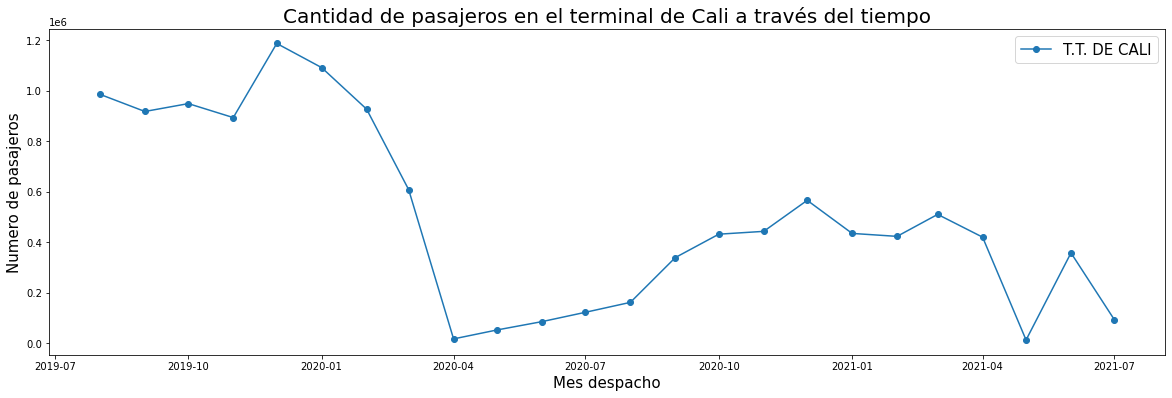

In [30]:
plt.figure(figsize=(20,6))
plt.plot('MES_DESPACHO','PASAJEROS',data = terminal_time('T.T. DE CALI',df),label = 'T.T. DE CALI', marker='o')
plt.xlabel('Mes despacho',size = 15)
plt.ylabel('Numero de pasajeros',size = 15)
plt.title('Cantidad de pasajeros en el terminal de Cali a través del tiempo',size = 20)
plt.legend(fontsize = 15)

Se observa que Cali siendo la terminal que historicamente ha movido más pasajero (en el rango de fechas de nuestros datos), se tiene que este sigue el mismo comportamiento antes, durante y despues de las restricciones de movilidad de la cuarentena, que el comportamiento presentado en toda Colombia.

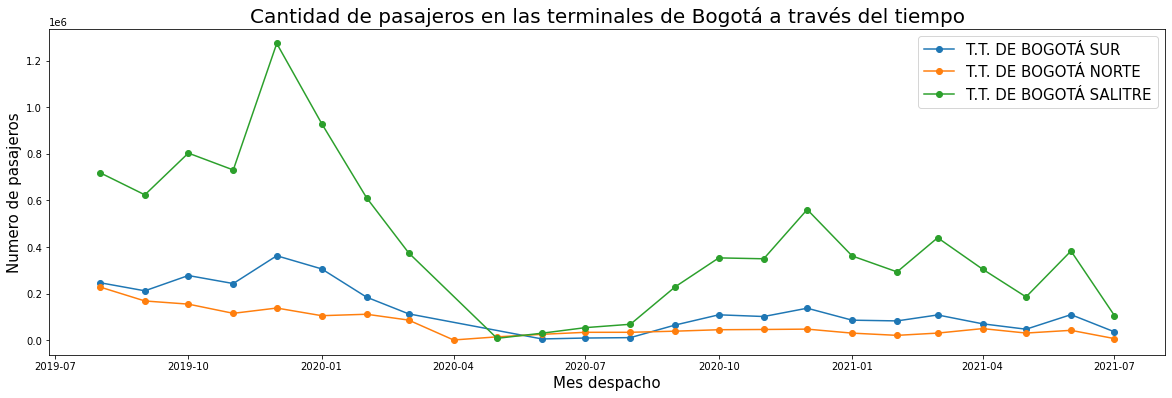

In [31]:
plt.figure(figsize=(20,6))
plt.plot('MES_DESPACHO','PASAJEROS',data = terminal_time('T.T. DE BOGOTÁ SUR',df),label = 'T.T. DE BOGOTÁ SUR', marker='o')
plt.plot('MES_DESPACHO','PASAJEROS',data = terminal_time('T.T. DE BOGOTÁ NORTE',df),label = 'T.T. DE BOGOTÁ NORTE', marker='o')
plt.plot('MES_DESPACHO','PASAJEROS',data = terminal_time('T.T. DE BOGOTÁ SALITRE',df),label = 'T.T. DE BOGOTÁ SALITRE', marker='o')
plt.xlabel('Mes despacho',size = 15)
plt.ylabel('Numero de pasajeros',size = 15)
plt.title('Cantidad de pasajeros en las terminales de Bogotá a través del tiempo',size = 20)
plt.legend(fontsize = 15)

Se observa que aunque la terminal del Norte  y Sur de Bogotá son tanto de Transito como de origen, se tiene que la del Salitre mueve más pasajeros siendo esta solo de Origen.

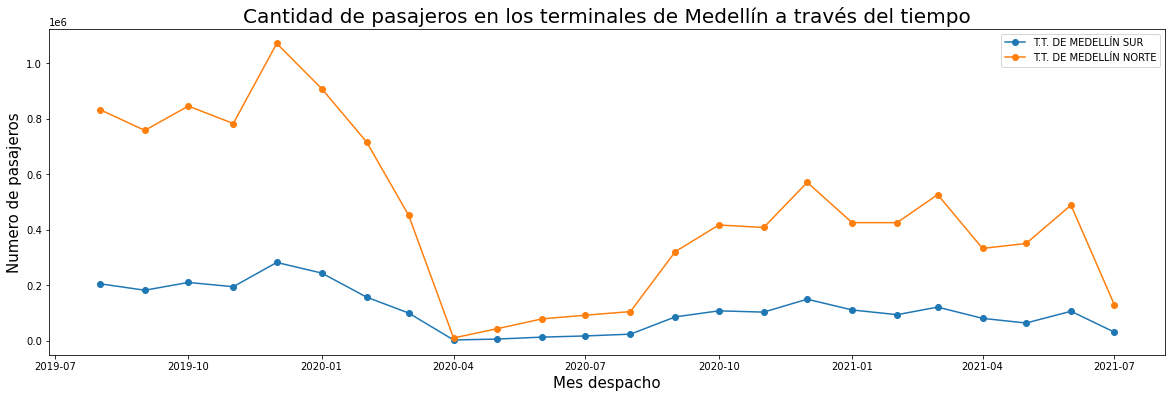

In [32]:
plt.figure(figsize=(20,6))
plt.plot('MES_DESPACHO','PASAJEROS',data = terminal_time('T.T. DE MEDELLÍN SUR',df),label = 'T.T. DE MEDELLÍN SUR', marker='o')
plt.plot('MES_DESPACHO','PASAJEROS',data = terminal_time('T.T. DE MEDELLÍN NORTE',df),label = 'T.T. DE MEDELLÍN NORTE', marker='o')
plt.xlabel('Mes despacho',size = 15)
plt.ylabel('Numero de pasajeros',size = 15)
plt.title('Cantidad de pasajeros en los terminales de Medellín a través del tiempo',size = 20)
plt.legend(fontsize = 15)
plt.legend()

En la anterior grafica se observa que aunque las dos terminales de Medellín son solo de Origen, se tiene que la del Norte mueve más pasajeros que la del Sur.

### Relaciones de numero de pasageros  y despachos por terminal.

Iniciaremos mostrando la correlacion entre pasageros y numero de despachos, sin considerar  una desagregacion por terminales:

In [33]:
df_sum = df[['DESPACHOS','PASAJEROS']]
df_sum.corr()

,DESPACHOS,PASAJEROS
DESPACHOS,1.000000,0.587729
PASAJEROS,0.587729,1.000000


Se observa que la correlacion que aunque es positiva no significativamente alta (indicando que la relacion tal ves no es lineal), pero iremos mas afondo considerando cada terminal por separado:

In [34]:
df_sum_1 = df.groupby(by = ['TERMINAL','FECHA_DESPACHO 2'])[['DESPACHOS','PASAJEROS']].sum().reset_index()
df_sum_1.drop(columns = ['FECHA_DESPACHO 2'],inplace = True)

# Se muestra cada una tabla con las correlaciones en cada terminal.
names_terminal = set(df['TERMINAL'])
for name in names_terminal:
    print(name+': '+str(df_sum_1[df_sum_1['TERMINAL'] == name].corr()['PASAJEROS'][0]))

T.T. DE BUCARAMANGA: 0.9318115851059978
T.T. DE DUITAMA: 0.9540822266426192
T.T. DE MANIZALES: 0.9580822242716344
T.T. DE CALI: 0.9040106756548385
T.T. DE SANTA MARTA: 0.7892540478657567
T.T. DE MAICAO: 0.7178396743654938
T.T. DE BARRANQUILLA: 0.5638392433510717
T.T. DE ARMENIA: 0.9317584645996643
T.T. DE AGUACHICA: 0.7279690102018987
T.T. DE SOCORRO: 0.49063284544402824
T.T. DE TULÚA: 0.9382252536009371
T.T. DE OCAÑA: 0.9544029621829047
T.T. DE IPIALES: 0.9419289709984475
T.T. DE CAUCASIA: 0.8687155391529326
T.T. DE VILLAGARZÓN: 0.8821602707533326
T.T. DE POPAYÁN: 0.904337279092513
T.T. DE BOGOTÁ SALITRE: 0.8298238949396186
T.T. DE FUSAGASUGA: 0.8531939970570281
T.T. DE PEREIRA: 0.9418289938433946
T.T. DE PAMPLONA: 1.0
T.T. DE VILLAVICENCIO: 0.707725481655501
T.T. DE VALLEDUPAR: 0.8187588403934591
T.T. DE MONTERÍA: 0.9187906969191002
T.T. DE CHIQUINQUIRÁ: 0.8825906188782214
T.T. DE PASTO: 0.9475415002143242
T.T. DE MEDELLÍN NORTE: 0.9172237173134734
T.T. DE APARTADÓ: 0.825930996880838

Aqui se observa que hay correlaciones significativamente mas altas  y bajas, por lo que se considera graficar las correlaciones mas interesantes:

Text(0.5, 1.0, 'Cantidad de pasajeros contra numero de despachos en la terminal de Pamplona')

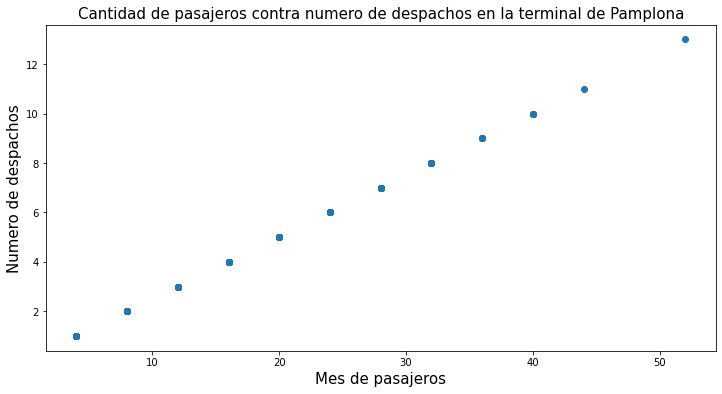

In [35]:
plt.figure(figsize=(12,6))
plt.plot('PASAJEROS','DESPACHOS',data = df[df['TERMINAL'] == 'T.T. DE PAMPLONA'],linestyle='',marker='o')
plt.xlabel('Mes de pasajeros',size = 15)
plt.ylabel('Numero de despachos',size = 15)
plt.title('Cantidad de pasajeros contra numero de despachos en la terminal de Pamplona',size = 15)

Text(0.5, 1.0, 'Cantidad de pasajeros contra numero de despachos en la terminal de Barranquilla')

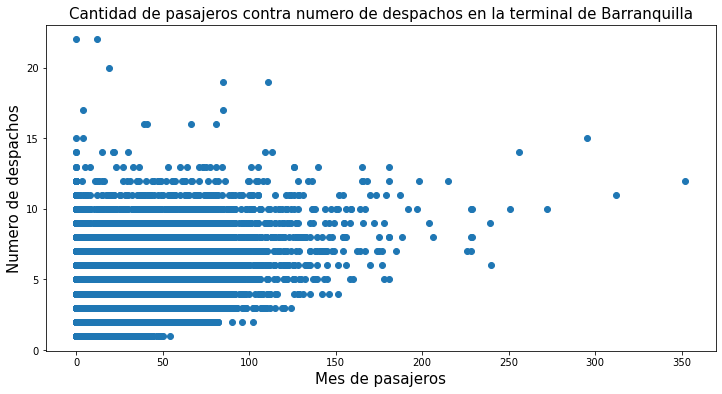

In [36]:
plt.figure(figsize=(12,6))
plt.plot('PASAJEROS','DESPACHOS',data = df[df['TERMINAL'] == 'T.T. DE BARRANQUILLA'],linestyle='',marker='o')
plt.xlabel('Mes de pasajeros',size = 15)
plt.ylabel('Numero de despachos',size = 15)
plt.title('Cantidad de pasajeros contra numero de despachos en la terminal de Barranquilla',size = 15)

Text(0.5, 1.0, 'Cantidad de pasajeros contra numero de despachos en la terminal de Manizalez')

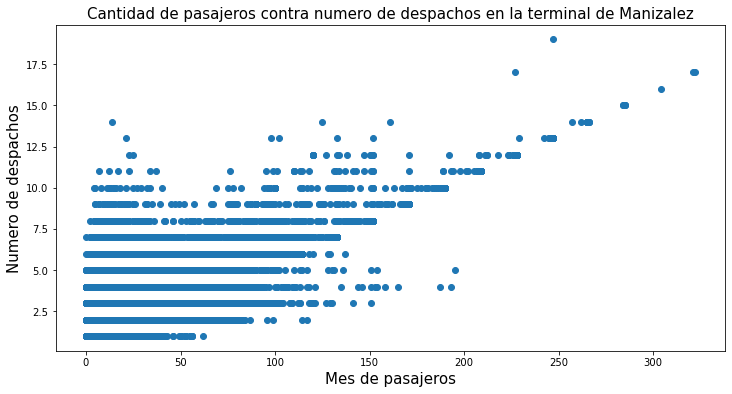

In [37]:
plt.figure(figsize=(12,6))
plt.plot('PASAJEROS','DESPACHOS',data = df[df['TERMINAL'] == 'T.T. DE MANIZALES'],linestyle='',marker='o')
plt.xlabel('Mes de pasajeros',size = 15)
plt.ylabel('Numero de despachos',size = 15)
plt.title('Cantidad de pasajeros contra numero de despachos en la terminal de Manizalez',size = 15)

Ahora consideraremos tres periodos de tiempo, teniendo en cuenta las restricciones de movilidad que genero la cuarentena a causa del  CIVID-19, esto para ver el comportamiento en cada terminal durantes estos tres peridos:

In [38]:
df_sum_2 = df.copy()

# Se crea los tres periodos de tiempo, considerando que las resstricciones de movilidad fueron entre marzo del 2020
#  y septiembre del 2020.

df_sum_2['RESTRICCION'] = ['PRE']*len(df_sum_2)
df_sum_2['RESTRICCION'].where(df_sum_2['MES_DESPACHO'] < '2020-03-01','ON',inplace= True)
df_sum_2['RESTRICCION'].where(df_sum_2['MES_DESPACHO'] < '2020-09-01','POS',inplace= True)

# SE hace una agragacion inicial de los datos, para sumar por dia la cantidad de despachos y pasajeros
df_sum_2 = df_sum_2.groupby(by = ['TERMINAL','FECHA_DESPACHO','RESTRICCION'])[['DESPACHOS','PASAJEROS']].sum().reset_index(level = 'FECHA_DESPACHO',drop = True)

# Se crea otro groupby para hacer las correlaciones y se hace un pivot para hacer mas 
# facil la lectura de la tabla
df_sum_2 = df_sum_2.reset_index()
df_sum_2 = df_sum_2.groupby(by = ['TERMINAL','RESTRICCION']).apply(lambda x: np.corrcoef(x['DESPACHOS'],x['PASAJEROS'])[0,1]).reset_index(name = 'corr')
df_sum_2 = pd.pivot_table(df_sum_2,values = 'corr',index='TERMINAL',columns='RESTRICCION')
df_sum_2 = df_sum_2[['PRE','ON','POS']]

In [ ]:
df_sum_2

## Nota: 
Este analisis es un acercamiento inicial de la variable Terminal; por lo que se vio hay varios anisis que aun faltan ser abarcados, como por ejemplo las relaciones entre Terminales  y Tipo de vehiculo, o Terminales  y Clase de vehiculo. 